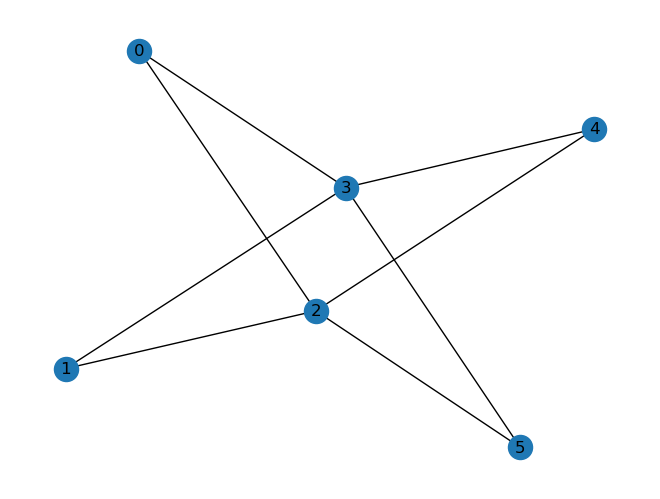

In [89]:
import pulp
import networkx as nx
G = nx.Graph()

G.add_edge(0, 2, weight=1)
G.add_edge(1, 3, weight=1)
G.add_edge(0, 3, weight=1)
G.add_edge(1, 2, weight=1)
G.add_edge(2, 5, weight=1)
G.add_edge(3, 5, weight=1)
G.add_edge(2, 4, weight=1)
G.add_edge(3, 4, weight=1)

nx.draw(G,with_labels=True)


In [91]:
import cvxpy as cp
import networkx as nx
import numpy as np

# Create a random graph for demonstration purposes
np.random.seed(0)

# Define the optimization variables
n = len(G.nodes)
X = cp.Variable((n, n), boolean=True)

# Define the MaxCut objective function
objective = cp.Maximize(0.5 * cp.sum(cp.multiply(nx.adjacency_matrix(G).toarray(), (1 - X))))

# Define the MaxCut constraints
constraints = []

# Each node should belong to either set 0 or set 1
for i in range(n):
    constraints.append(cp.sum(X[i, :]) == 1)

# Formulate the MaxCut problem
problem = cp.Problem(objective, constraints)

# Solve the MaxCut problem
problem.solve()

# Extract the optimal solution
cut_value = problem.value
cut = X.value

# Print the results
print("MaxCut Value:", cut_value)
print("Partition of Nodes:")
for i in range(n):
    if cut[i, 0] == 1:
        print(f"Node {i}: Set 0")
    else:
        print(f"Node {i}: Set 1")


MaxCut Value: 8.0
Partition of Nodes:
Node 0: Set 0
Node 1: Set 1
Node 2: Set 0
Node 3: Set 1
Node 4: Set 0
Node 5: Set 0


In [94]:

import random

def maxcut_greedy(graph):
    set0 = set()
    set1 = set()
    
    # Randomly select a starting vertex and add it to set0
    start_vertex = random.choice(list(graph.nodes()))
    set0.add(start_vertex)
    
    # Iterate over the remaining vertices and add them to set0 or set1
    for vertex in graph.nodes():
        if vertex not in set0:
            if any(graph.has_edge(vertex, v) for v in set0):
                set1.add(vertex)
            else:
                set0.add(vertex)
    
    return set0, set1

# Find the MaxCut using the greedy heuristic
set0, set1 = maxcut_greedy(G)

# Calculate the MaxCut value
cut_value = sum(1 for u, v in G.edges() if (u in set0 and v in set1) or (u in set1 and v in set0))

# Print the results
print("Set 0:", set0)
print("Set 1:", set1)
print("MaxCut Value:", cut_value)

Set 0: {2, 3}
Set 1: {0, 1, 4, 5}
MaxCut Value: 8
